In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [2]:
order_df = pd.read_csv('Dataset/orders.csv')
products_df = pd.read_csv('Dataset/products.csv')
order_products_train_df = pd.read_csv('Dataset/order_products__train.csv')
order_products_prior_df = pd.read_csv('Dataset/order_products__prior.csv')
departments_df = pd.read_csv('Dataset/departments.csv')
aisles_df = pd.read_csv('Dataset/aisles.csv')

# To predict the products that will be re-ordered

**The Order dataset has the details of the orders placed by the customers.**

Order id - Order id of the order placed by the customer.
User id - id of the customer.
eval set - to which set (prior, train, test) an order belongs.
order number - the order number of each customers.
order_dow - ordered day of the order placed.
order_hour_of_day - hour of the day order was placed.
days_since_prior_order - Interval between the previous order and the current orders.

In [3]:
order_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1
4,5,Green Chile Anytime Sauce,5,13


**Order products train**

order id - order id of the order placed by customer.
product id - id of the item that the customer ordered.
add to cart order - the order the products were added to the cart.
reordered - the products that were ordered in the previous order and the current order.

In [5]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


**order products prior**

order id - order id of the order placed by customer.
product id - id of the item that the customer ordered.
add to cart order - the order the products were added to the cart.
reordered - the products that were ordered in the previous order and the current order.

In [6]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


**departments**
the details of the department that the products belong to

department id - id of the department
department - name of the deaprtment

In [7]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


**ailse**

details of the aisle

aisle - id of the aisle
aisle - Name of the aisle

In [8]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


# Null Checks

In [9]:
order_df.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [10]:
order_products_train_df.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [11]:
order_products_prior_df.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [12]:
departments_df.isnull().sum()

department_id    0
department       0
dtype: int64

In [13]:
aisles_df.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

# Info

In [14]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [15]:
order_products_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [16]:
order_products_prior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


In [17]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [18]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


## order dataframe analysis

In [19]:
order_df[(order_df['days_since_prior_order'].isna()) & (order_df.order_number != 1)]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


since all the nan values are present only when the order_number is 1 these nan values can be converted to 0 since when placing the first order the days_since_prior_order will not have any previous orders to fill in.

In [20]:
val_cnts = order_df.eval_set.value_counts()
val_cnts

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

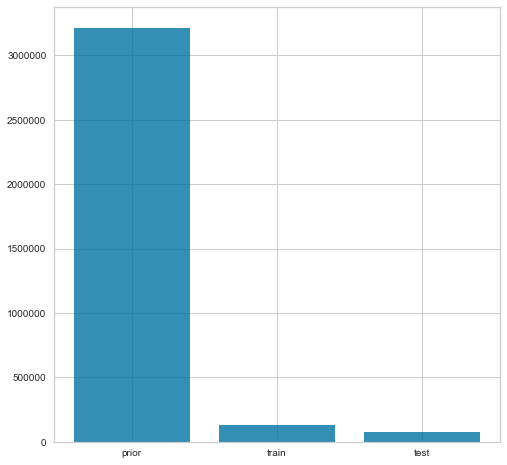

In [21]:
plt.figure(figsize=(8,8))
plt.bar(val_cnts.index,val_cnts.values,alpha=0.8)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,8))
plt.show()

the dataset provided the highest records of the prior compared to the train and test

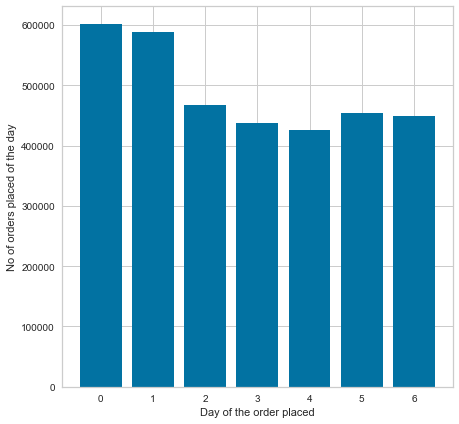

In [22]:
order_day_val_cnts = order_df.order_dow.value_counts()

plt.figure(figsize=(7,7))
plt.bar(order_day_val_cnts.index,order_day_val_cnts.values)
plt.xlabel('Day of the order placed')
plt.ylabel('No of orders placed of the day')
plt.show()

The day of 0 and 1 may be considred as saturday and sunday they have the highest records placed compared to the other days. Tn that case considering that holidays get more orders than weekdays.

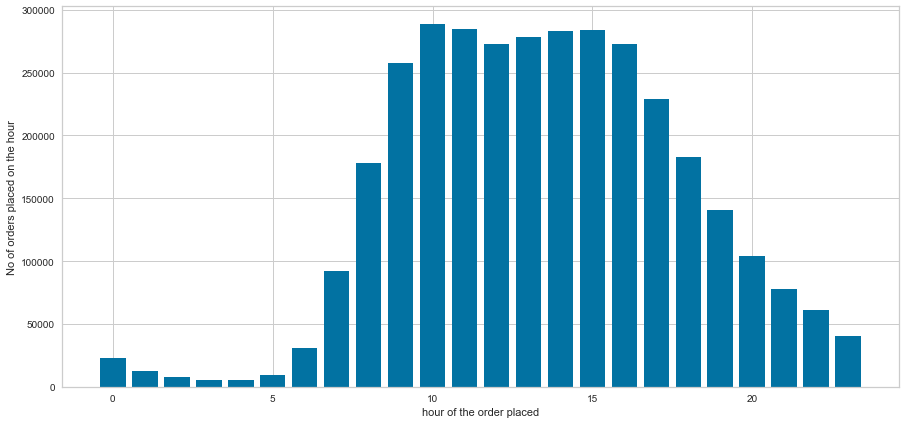

In [23]:
ordered_hours_val_cnts = order_df.order_hour_of_day.value_counts()

plt.figure(figsize=(15,7))
plt.bar(ordered_hours_val_cnts.index,ordered_hours_val_cnts.values)
plt.xlabel('hour of the order placed')
plt.ylabel('No of orders placed on the hour')
plt.show()

This shows that time period between the 10am and 4pm has highest orders placed. 

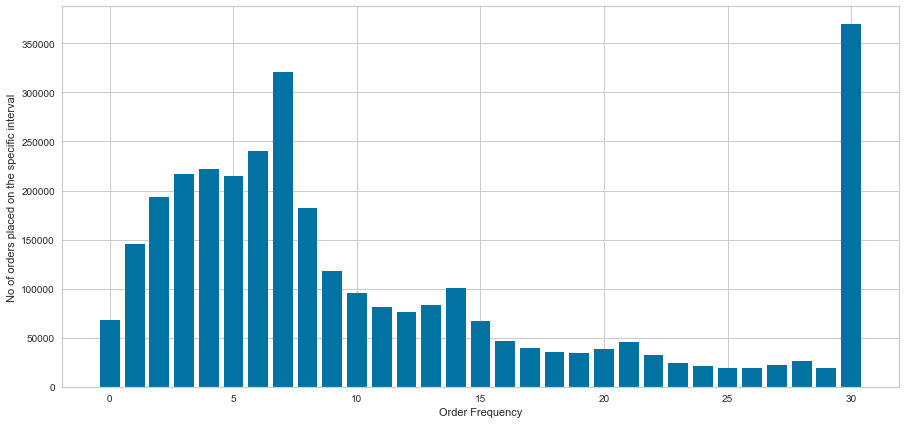

In [24]:
order_frequency = order_df.days_since_prior_order.value_counts()

plt.figure(figsize=(15,7))
plt.bar(order_frequency.index,order_frequency.values)
plt.xlabel('Order Frequency')
plt.ylabel('No of orders placed on the specific interval')
plt.show()

The customers are more likely to order once in a week and monthly once. also there is a little spike in orders in 14th and 21st day.

In [25]:
# No of customers
order_df.user_id.nunique()

206209

In [26]:
def get_unique_count(x):
    return len(np.unique(x))

cnts = order_df.groupby('eval_set')['user_id'].aggregate(get_unique_count)
cnts

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

so there are 206209 cutomers in total there are 131209 revords for training and 75000 data to predict

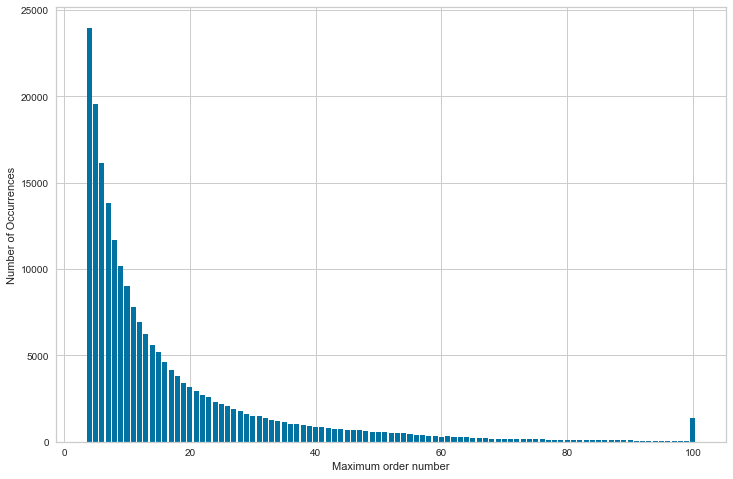

In [27]:
cnts = order_df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
cnts = cnts.order_number.value_counts()

plt.figure(figsize=(12,8))
plt.bar(cnts.index,cnts.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Maximum order number')
plt.show()

each customer has a minimum of 4 orders placed and maximum orders placed by a customers was 100

In [28]:
print('Prior :',order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0])
print('Train :',order_products_train_df.reordered.sum() / order_products_train_df.shape[0])

Prior : 0.5896974667922161
Train : 0.5985944127509629


there is an average of 59% of the orders that were re-ordered in both train and prior dataset

In [29]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped_df = grouped_df.add_to_cart_order.value_counts()
grouped_df
# grouped_df[grouped_df['add_to_cart_order'] == 8]

5     8895
6     8708
7     8541
4     8218
3     8033
      ... 
68       2
66       2
75       1
77       1
67       1
Name: add_to_cart_order, Length: 75, dtype: int64

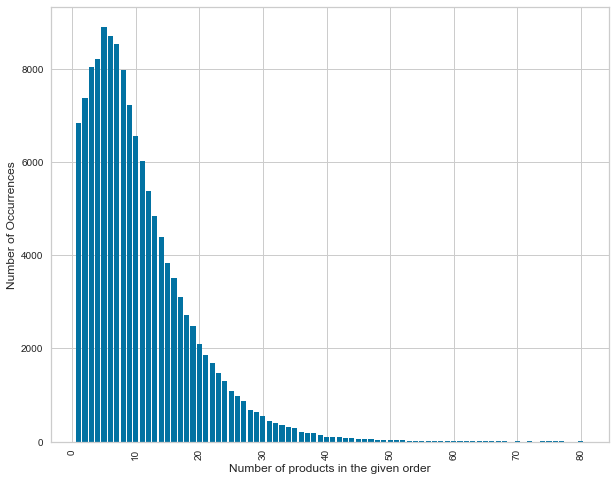

In [30]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnts = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(10,8))
plt.bar(cnts.index, cnts.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
prod_counts = pd.DataFrame(order_products_prior_df.groupby('order_id')['product_id'].count())
prod_counts.head()

,product_id
order_id,
2,9
3,8
4,13
5,26
6,3


In [32]:
prod_counts = prod_counts.rename(columns={'product_id' : 'num_products'})

In [33]:
user_data = order_df.join(prod_counts, how='inner', on='order_id')
user_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products
0,2539329,1,prior,1,2,8,NaN,5
1,2398795,1,prior,2,3,7,15.0,6
2,473747,1,prior,3,3,12,21.0,5
3,2254736,1,prior,4,4,7,29.0,5
4,431534,1,prior,5,4,15,28.0,8


In [34]:
len(user_data)

3214874

In [35]:
# Calculate total number of orders per customer
num_orders = user_data.groupby('user_id')['order_number'].max()
num_orders.head()

user_id
1    10
2    14
3    12
4     5
5     4
Name: order_number, dtype: int64

In [36]:
# Calculate rate at which each customer orders on peak days
# Create boolean column to record whether order occurred on a peak day
user_data['order_on_peak'] = np.where(user_data['order_dow'] <=1, 1, 0)
user_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products,order_on_peak
0,2539329,1,prior,1,2,8,NaN,5,0
1,2398795,1,prior,2,3,7,15.0,6,0
2,473747,1,prior,3,3,12,21.0,5,0
3,2254736,1,prior,4,4,7,29.0,5,0
4,431534,1,prior,5,4,15,28.0,8,0


In [37]:
# Calculate rate of peak day ordering per customer
peakday_rate = round(user_data.groupby('user_id')['order_on_peak'].mean(), 2)
peakday_rate.value_counts()

0.33    19334
0.00    19327
0.50    13317
0.25    12049
0.67     8448
        ...  
0.95       28
0.96       20
0.97        7
0.98        4
0.01        2
Name: order_on_peak, Length: 100, dtype: int64

In [38]:
# Calculate median hour of day at which each customer places their orders
# Calculate median ordering hour per user
med_hour = round(user_data.groupby('user_id')['order_hour_of_day'].median(), 0)
med_hour.head()

user_id
1     8.0
2    10.0
3    16.0
4    13.0
5    17.0
Name: order_hour_of_day, dtype: float64

Calculate rate at which each customer orders during peak hours

In [39]:
# Create boolean column to record whether order occured during peak hours
# Peak hours defined as interquartile range of order times
user_data['peak_time'] = np.where((user_data.order_hour_of_day >= 10) 
                                  & (user_data.order_hour_of_day <= 16), 1, 0)
user_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,num_products,order_on_peak,peak_time
0,2539329,1,prior,1,2,8,NaN,5,0,0
1,2398795,1,prior,2,3,7,15.0,6,0,0
2,473747,1,prior,3,3,12,21.0,5,0,1
3,2254736,1,prior,4,4,7,29.0,5,0,0
4,431534,1,prior,5,4,15,28.0,8,0,1


In [40]:
# Calculating rate of peak time ordering per customer
peaktime_rate = round(user_data.groupby('user_id')['peak_time'].mean(), 2)
peaktime_rate.value_counts()

0.67    16613
1.00    15647
0.50    15586
0.33    11260
0.75     9378
        ...  
0.04       33
0.98       32
0.03       10
0.02        6
0.01        1
Name: peak_time, Length: 100, dtype: int64

Average lag between orders per customer

In [41]:
# Calculate mean lag per customer
mean_lag = round(user_data.groupby('user_id')['days_since_prior_order'].mean(), 0)
mean_lag.head()

user_id
1    20.0
2    15.0
3    12.0
4    14.0
5    13.0
Name: days_since_prior_order, dtype: float64

mean number of products ordered per customer

In [42]:
# Calculate mean products ordered per customer
mean_products = round(user_data.groupby('user_id')['num_products'].mean(), 0)
mean_products.head()

user_id
1     6.0
2    14.0
3     7.0
4     4.0
5     9.0
Name: num_products, dtype: float64

Concatenate and transform all the new features

In [43]:
# Concatenate new features into one DataFrame
features = pd.concat([num_orders, peakday_rate, med_hour, peaktime_rate, 
                      mean_lag, mean_products], axis=1)
features.columns = ['num_orders', 'peakday_rate', 'med_hour', 'peaktime_rate', 
                    'mean_lag', 'mean_products']
features.head()

,num_orders,peakday_rate,med_hour,peaktime_rate,mean_lag,mean_products
user_id,,,,,,
1,10,0.30,8.0,0.40,20.0,6.0
2,14,0.36,10.0,0.79,15.0,14.0
3,12,0.67,16.0,0.58,12.0,7.0
4,5,0.00,13.0,1.00,14.0,4.0
5,4,0.50,17.0,0.50,13.0,9.0


In [44]:
# Check for missing values
features.isna().sum()

num_orders       0
peakday_rate     0
med_hour         0
peaktime_rate    0
mean_lag         0
mean_products    0
dtype: int64

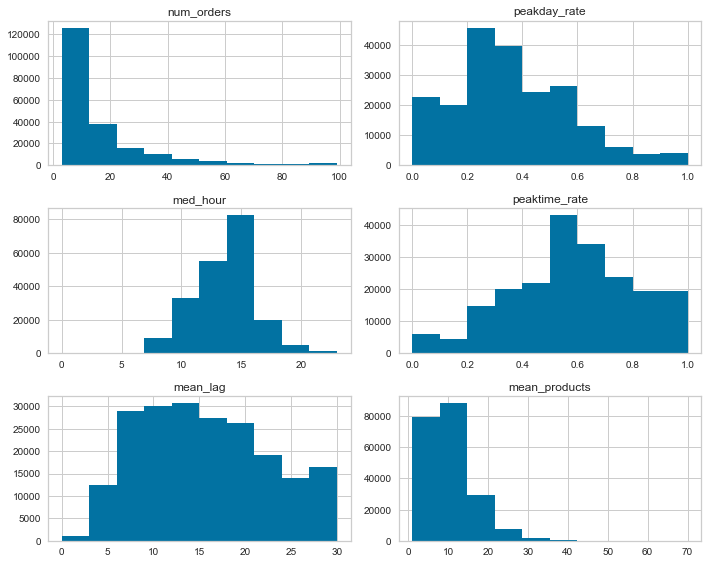

In [45]:
# Visualize distribution of each feature
features.hist(figsize=(10,8))
plt.tight_layout();

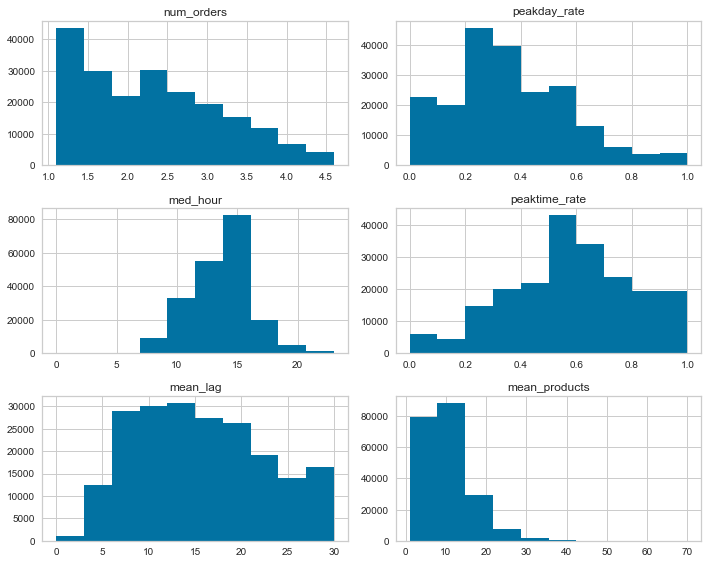

In [46]:
# Log-transform `num_orders` and replot features
features['num_orders'] = np.log(features['num_orders'])
features.hist(figsize=(10,8))
plt.tight_layout();

In [47]:
# Scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feat_scaled = scaler.fit_transform(features)

In [48]:
# Convert to DataFrame and check summary stats
feat_scaled = pd.DataFrame(feat_scaled)
feat_scaled.describe()

,0,1,2,3,4,5
count,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05,2.062090e+05
mean,3.955621e-16,-7.292999e-16,-6.120672e-17,3.618518e-16,2.396103e-16,1.471535e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.400469e+00,-1.619667e+00,-5.133526e+00,-2.447465e+00,-2.138393e+00,-1.524627e+00
25%,-8.201197e-01,-6.605455e-01,-6.008582e-01,-7.135351e-01,-8.730152e-01,-6.729800e-01
50%,-1.523349e-01,-1.124758e-01,1.545865e-01,8.999362e-02,-1.700276e-01,-1.619917e-01
75%,6.965760e-01,6.639561e-01,5.323088e-01,7.243584e-01,6.735575e-01,5.193260e-01
max,2.571916e+00,2.947580e+00,3.554087e+00,1.781633e+00,2.079533e+00,1.022810e+01


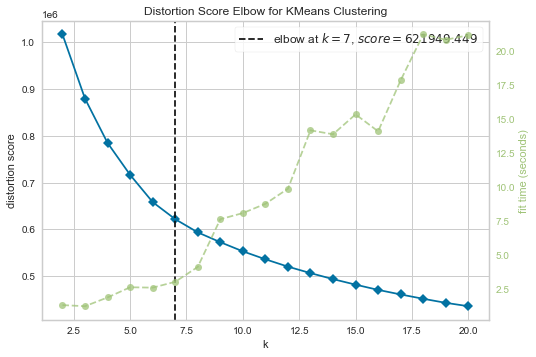

In [49]:
# Visualize performance of KMeans at various values k
# This approaches uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 21))

visualizer.fit(feat_scaled)   
visualizer.show();

In [50]:
# Define a function to test KMeans at various k
# This approach uses silhouette score to evaluate KMeans
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values and line plot of Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, 
                                                random_state=1), 3)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)

        print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(4,4))

            plt.title('Silhouette Score Elbow for KMeans Clustering')
            plt.xlabel('k')
            plt.ylabel('silhouette score')
            sns.pointplot(x=n_clu, y=km_ss)
            plt.savefig('silhouette_score.png', format='png', dpi=300,
                        pad_inches=2.0)
            plt.tight_layout()
            plt.show()

In [51]:
# Evaluate KMeans at various values k
# optimal_kmeans(feat_scaled, 2, 10)

In [54]:
# Define a function to calculate and plot specified # of clusters
def kmeans(df, clusters_number):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        end : int. Ending range of kmeans to test.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''   
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(df)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = df.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], 
                    hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new, cluster_labels

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(               0         1         2         3         4         5  Cluster
 0      -0.032635 -0.249493 -2.111747 -0.755826  0.673558 -0.672980        4
 1       0.349632  0.024542 -1.356303  0.893522 -0.029430  0.689655        0
 2       0.174501  1.440388  0.910031  0.005412 -0.451223 -0.502651        1
 3      -0.820120 -1.619667 -0.223136  1.781633 -0.170028 -1.013639        0
 4      -1.073633  0.663956  1.287753 -0.332916 -0.310625 -0.161992        5
 ...          ...       ...       ...       ...       ...       ...      ...
 206204 -1.400469 -1.619667  0.532309  1.781633  0.673558  0.178667        6
 206205  2.128351  0.161559  1.287753 -0.798117 -1.576003 -1.013639        3
 206206  0.501337  0.115887 -0.600858  0.174576 -0.170028  0.689655        2
 206207  1.772897 -0.203821  0.532309  0.470612 -1.154210  0.689655        3
 206208  0.265438 -0.203821 -0.223136  0.808940  0.392362  0.008338        0
 
 [206209 rows x 7 columns],
 array([4, 0, 1, ..., 2, 3, 0]))

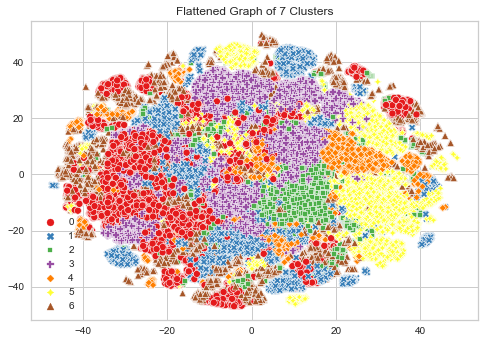

In [55]:
# Visualize clusters for k=7
kmeans(feat_scaled, 7)

The clusters are pretty messy.

Perform KMeans clustering on RFM features

In [56]:
# Drop unwanted features
features_fewer = features.drop(['med_hour', 'peakday_rate', 'peaktime_rate'], axis=1)

# Scale selected features
scaler = StandardScaler()
feat_few_scaled = scaler.fit_transform(features_fewer)

# Convert to DataFrame
feat_few_scaled = pd.DataFrame(feat_few_scaled)

Determine best value for k

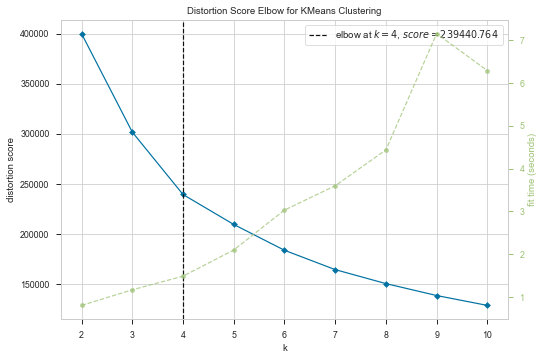

In [60]:
# Evaluate KMeans for various values k
# This method uses distortion score to evaluate KMeans
sns.set_context('paper')
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 11))

visualizer.fit(feat_few_scaled)   
visualizer.show(outpath='elbow_plot_disto.png', dpi=300);

Visualize clusters with t-SNE

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(               0         1         2  Cluster
 0      -0.032635  0.673558 -0.672980        0
 1       0.349632 -0.029430  0.689655        1
 2       0.174501 -0.451223 -0.502651        2
 3      -0.820120 -0.170028 -1.013639        0
 4      -1.073633 -0.310625 -0.161992        0
 ...          ...       ...       ...      ...
 206204 -1.400469  0.673558  0.178667        0
 206205  2.128351 -1.576003 -1.013639        2
 206206  0.501337 -0.170028  0.689655        1
 206207  1.772897 -1.154210  0.689655        2
 206208  0.265438  0.392362  0.008338        0
 
 [206209 rows x 4 columns],
 array([0, 1, 2, ..., 1, 2, 0]))

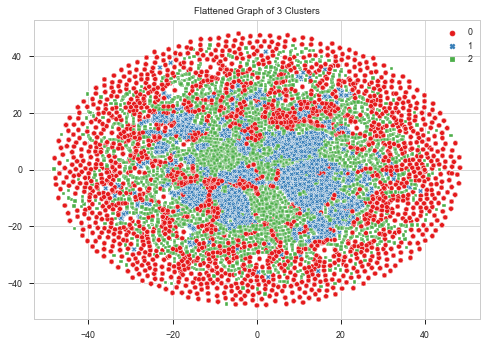

In [62]:
# Plot clusters for k=3
kmeans(feat_few_scaled, 3)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(               0         1         2  Cluster
 0      -0.032635  0.673558 -0.672980        0
 1       0.349632 -0.029430  0.689655        2
 2       0.174501 -0.451223 -0.502651        3
 3      -0.820120 -0.170028 -1.013639        3
 4      -1.073633 -0.310625 -0.161992        3
 ...          ...       ...       ...      ...
 206204 -1.400469  0.673558  0.178667        0
 206205  2.128351 -1.576003 -1.013639        1
 206206  0.501337 -0.170028  0.689655        2
 206207  1.772897 -1.154210  0.689655        1
 206208  0.265438  0.392362  0.008338        3
 
 [206209 rows x 4 columns],
 array([0, 2, 3, ..., 2, 1, 3]))

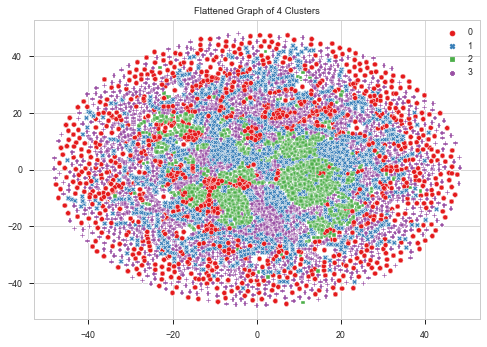

In [63]:
# Plot clusters for k=4
kmeans(feat_few_scaled, 4)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(               0         1         2  Cluster
 0      -0.032635  0.673558 -0.672980        0
 1       0.349632 -0.029430  0.689655        0
 2       0.174501 -0.451223 -0.502651        0
 3      -0.820120 -0.170028 -1.013639        2
 4      -1.073633 -0.310625 -0.161992        2
 ...          ...       ...       ...      ...
 206204 -1.400469  0.673558  0.178667        1
 206205  2.128351 -1.576003 -1.013639        4
 206206  0.501337 -0.170028  0.689655        0
 206207  1.772897 -1.154210  0.689655        4
 206208  0.265438  0.392362  0.008338        0
 
 [206209 rows x 4 columns],
 array([0, 0, 0, ..., 0, 4, 0]))

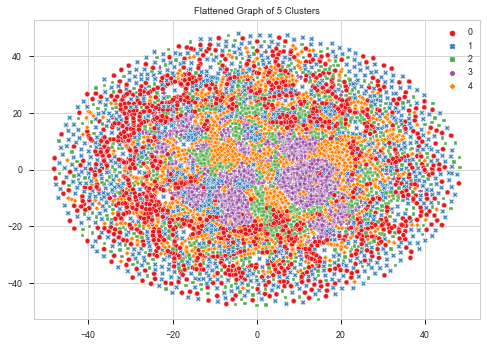

In [64]:
# Plot clusters for k=5
kmeans(feat_few_scaled, 5)

Perform KMeans clustering with remaining features


Determine best value for k

In [67]:
# Select remaining features
features_dt = features.loc[:, ['med_hour', 'peakday_rate', 'peaktime_rate']]

# Scale and convert to DataFrame
scaler = StandardScaler()
feat_dt_scaled = scaler.fit_transform(features_dt)
feat_dt_scaled = pd.DataFrame(feat_dt_scaled)

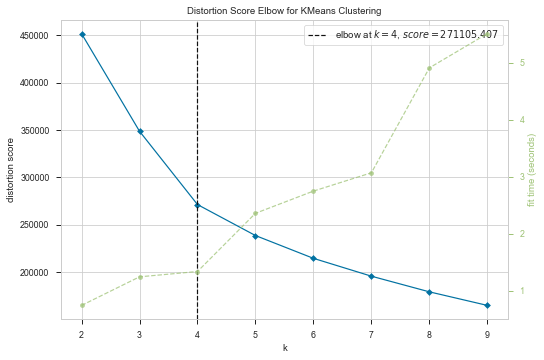

In [68]:
# Evaluate KMeans for various values k
# This method uses distortion score to evaluate KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(feat_dt_scaled)   
visualizer.show();

Visualize clusters with t-SNE

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(               0         1         2  Cluster
 0      -2.111747 -0.249493 -0.755826        3
 1      -1.356303  0.024542  0.893522        0
 2       0.910031  1.440388  0.005412        2
 3      -0.223136 -1.619667  1.781633        0
 4       1.287753  0.663956 -0.332916        1
 ...          ...       ...       ...      ...
 206204  0.532309 -1.619667  1.781633        0
 206205  1.287753  0.161559 -0.798117        1
 206206 -0.600858  0.115887  0.174576        0
 206207  0.532309 -0.203821  0.470612        0
 206208 -0.223136 -0.203821  0.808940        0
 
 [206209 rows x 4 columns],
 array([3, 0, 2, ..., 0, 0, 0]))

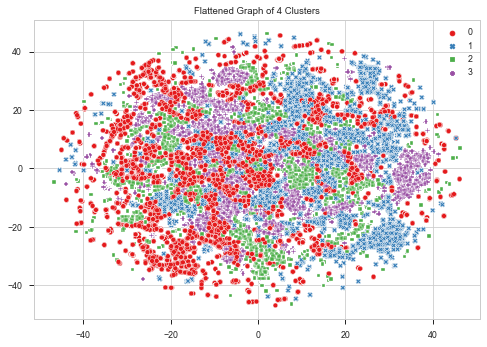

In [69]:
# Plot clusters for k=4
kmeans(feat_dt_scaled, 4)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(               0         1         2  Cluster
 0      -2.111747 -0.249493 -0.755826        0
 1      -1.356303  0.024542  0.893522        2
 2       0.910031  1.440388  0.005412        1
 3      -0.223136 -1.619667  1.781633        2
 4       1.287753  0.663956 -0.332916        3
 ...          ...       ...       ...      ...
 206204  0.532309 -1.619667  1.781633        2
 206205  1.287753  0.161559 -0.798117        3
 206206 -0.600858  0.115887  0.174576        2
 206207  0.532309 -0.203821  0.470612        4
 206208 -0.223136 -0.203821  0.808940        2
 
 [206209 rows x 4 columns],
 array([0, 2, 1, ..., 2, 4, 2]))

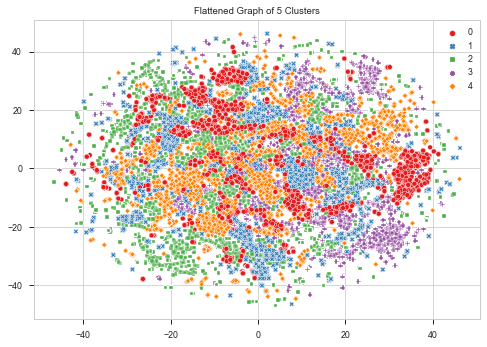

In [70]:
# Plot clusters for k=5
kmeans(feat_dt_scaled, 5)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(               0         1         2  Cluster
 0      -2.111747 -0.249493 -0.755826        4
 1      -1.356303  0.024542  0.893522        1
 2       0.910031  1.440388  0.005412        0
 3      -0.223136 -1.619667  1.781633        1
 4       1.287753  0.663956 -0.332916        0
 ...          ...       ...       ...      ...
 206204  0.532309 -1.619667  1.781633        1
 206205  1.287753  0.161559 -0.798117        2
 206206 -0.600858  0.115887  0.174576        3
 206207  0.532309 -0.203821  0.470612        3
 206208 -0.223136 -0.203821  0.808940        1
 
 [206209 rows x 4 columns],
 array([4, 1, 0, ..., 3, 3, 1]))

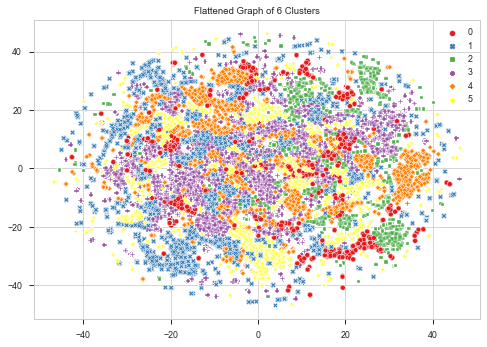

In [71]:
# Plot clusters for k=6
kmeans(feat_dt_scaled, 6)